# Imports

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable

# Definition of the Polynomials

In [32]:
def cheb(n: int, x: float | np.ndarray) -> float | np.ndarray:
    return np.cos(n * np.acos(x))

# Computing Coefficients

## Dirac Delta

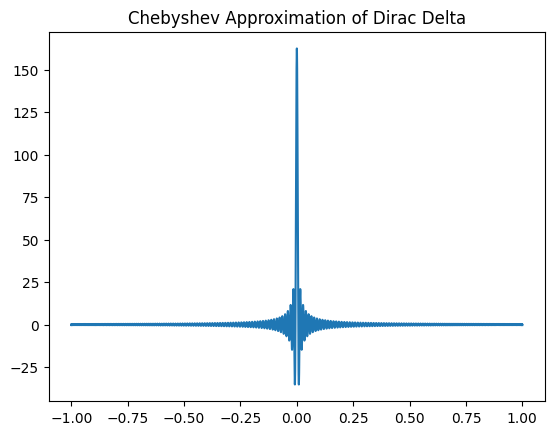

In [33]:
# Parameter
nmax = 512
plot = 10000

# Coefficients
an = []
for n in range(nmax):
    an += [(2/np.pi) * cheb(n, 0)]

an[0] /= 2

# Expansion
xx = np.linspace(-1, 1, plot)
ff = np.zeros_like(xx)
for n in range(nmax):
    ff += an[n] * cheb(n, xx)

# Ploting
plt.plot(xx, ff, label=f"Polynomials up to order n = {nmax}")
plt.title("Chebyshev Approximation of Dirac Delta")
plt.show()

## General Function

In [34]:
def integrate(func: Callable, mini: float = -1, maxi: float = 1, points: int = 1000) -> float:
    # Add a point that will be discarded
    points += 1

    # Integrate using the midpoint rule to avoid evaluating at -1 and 1
    h = (maxi - mini)/(points - 1)
    xx = np.linspace(mini, maxi, points)[:-1]
    ff = func(xx + h/2)

    return np.sum(ff * h)

In [35]:
def lorentz(xx: float | np.ndarray, gam: float = 0.01) -> float | np.ndarray:
    return (gam / np.pi) / (xx**2 + gam**2)

In [48]:
def cheb1D(func: Callable, nmax: int = 512, integral: int = 2000) -> tuple[np.ndarray, np.ndarray]:
    # Add a point that will be discarded
    integral += 1

    # Integrate using the midpoint rule to avoid evaluating at -1 and 1
    h = 2/(integral - 1)
    xx = np.linspace(-1, 1, integral)[:-1] + h/2

    ff = func(xx)
    ww = 1 / np.sqrt(1 - xx**2)

    # Zero-order approximation
    cc = (1 / np.pi) * np.sum(ww * ff) * h
    
    # Compute the coefficients by integrating against the function
    aa = np.acos(xx)
    for n in range(1, nmax):
        tt = np.cos(n * aa)
        an = (2 / np.pi) * np.sum(ww * ff * tt) * h

        # Compute the approximation
        cc += an * tt
        
    return (xx, cc)

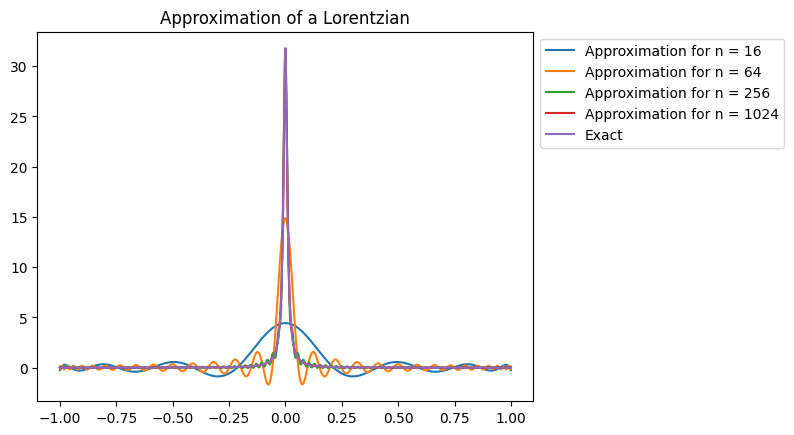

<Figure size 1600x800 with 0 Axes>

In [54]:
nn = [16, 64, 256, 1024]
for nmax in nn:
    # Get the approximation
    xx, cc = cheb1D(lorentz, nmax = nmax)

    # Plot agains the real function
    plt.plot(xx, cc, label=f"Approximation for n = {nmax}")

plt.plot(xx, lorentz(xx), label="Exact")
plt.title("Approximation of a Lorentzian")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.figure(figsize=(16, 8))
plt.show()